In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import numpy as np
import warnings
import scipy as scipy
from scipy import optimize
from scipy.optimize import differential_evolution
from tqdm import tqdm
from matplotlib.pyplot import cm
from collections import OrderedDict
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
hdulist = fits.open('../data/composite_Io_disk.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data

hdulist2 = fits.open('../data/composite_Io_eclipsed (1).fits')
evt_data2 = Table(hdulist2[1].data)
image_data2 = hdulist2[1].data
df2 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength2 = df2['Wavelength']
df_species2 = df2['Species']
wl2 = evt_data2['WAVELENGTH'].data
flux2 = evt_data2['FLUX'].data

hdulist3 = fits.open('../data/composite_Io_sunlit.fits')
evt_data3 = Table(hdulist3[1].data)
image_data3 = hdulist3[1].data
df3 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength3 = df3['Wavelength']
df_species3 = df3['Species']
wl3 = evt_data3['WAVELENGTH'].data
flux3 = evt_data3['FLUX'].data

hdulist4 = fits.open('../data/composite_Io_jets.fits')
evt_data4 = Table(hdulist4[1].data)
image_data4 = hdulist4[1].data
df4 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength4 = df4['Wavelength']
df_species4 = df4['Species']
wl4 = evt_data4['WAVELENGTH'].data
flux4 = evt_data4['FLUX'].data

In [4]:
df = pd.read_csv('../data/solar_lines.csv') #spaces in csv file will make df object type and not float64
df_wavelength = df['Wavelength']

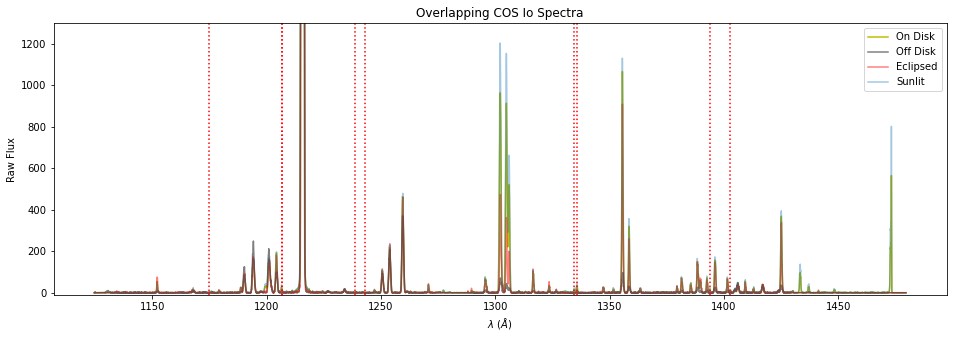

In [5]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T,label='On Disk',color='y') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data4['WAVELENGTH'].T, evt_data4['FLUX'].T, label='Off Disk',alpha=0.5,color='black') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data2['WAVELENGTH'].T, evt_data2['FLUX'].T, label='Eclipsed',alpha=0.5,color='r') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data3['WAVELENGTH'].T, evt_data3['FLUX'].T, label='Sunlit',alpha=0.4)
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("Overlapping COS Io Spectra")
plt.legend()
plt.ylim(-10,1300)
for xc in df_wavelength:
    plt.axvline(x=xc, color = 'red', linestyle = 'dotted')

In [6]:
def gaussian(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [7]:
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

In [26]:
wavelength_list = df_wavelength.values.tolist()

In [28]:
wavelength_list

[1174.93,
 1206.51,
 1206.53,
 1238.821,
 1242.804,
 1334.532,
 1335.708,
 1393.76,
 1402.77]

In [37]:
i=5
line = wavelength_list[i]
left_bound = 0.9995*line
right_bound = 1.0005*line
sub_region = (evt_data2['WAVELENGTH'] > left_bound) & (evt_data2['WAVELENGTH'] < right_bound) #only take values within this area
wl2 = evt_data2['WAVELENGTH'][sub_region]
flux2 = evt_data2['FLUX'][sub_region]
wl3 = evt_data3['WAVELENGTH'][sub_region]
flux3 = evt_data3['FLUX'][sub_region]
unc = 0.1*flux3 #placeholder uncertainty
wl3 = wl3.data
flux3 = flux3.data
guess1 = [line, 1, 1200]
optim = optimize.least_squares(errfunc1, guess1, args=(wl3, flux3),
                               bounds=([guess1[0]-0.01, 0, 0],[guess1[0]+0.01, guess1[1]+0.1, guess1[2]+5]))

Text(0.5, 1.0, 'Line 1334.532')

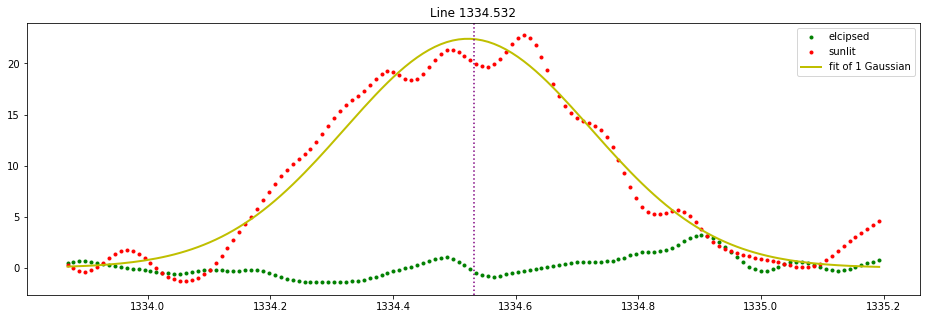

In [38]:
plt.figure(figsize=(16, 5))
plt.plot(wl2, flux2, 'g.', label='elcipsed')
plt.plot(wl3, flux3, 'r.', label='sunlit')
plt.plot(wl2, gaussian(wl2, *optim['x']),
    lw=2, c='y', label='fit of 1 Gaussian')
plt.axvline(x=line, color = 'purple', linestyle = 'dotted')
plt.legend(loc='best')
plt.title('Line {}'.format(guess1[0]))